In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats

In [2]:
data = pd.read_csv('/content/Warehouse_and_Retail_Sales.csv')
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


,0
YEAR,0
MONTH,0
SUPPLIER,167
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,1
RETAIL SALES,3
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


Provjeravamo ima li null vrijednosti, i uklanjamo ih

In [3]:
data_clean = data.dropna(subset=['SUPPLIER', 'ITEM TYPE', 'RETAIL SALES'])

In [4]:
data_clean.isnull().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,0
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL SALES,0
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


In [5]:
print("Prvih nekoliko redaka očišćenih podataka:")
print(data_clean.head())

Prvih nekoliko redaka očišćenih podataka:
   YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                  BOOTLEG RED - 750ML      WINE          0.00   
1            MOMENT DE PLAISIR - 750ML      WINE          0.00   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
3        SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
4       SANTORINI GAVALA WHITE - 750ML      WINE          0.82   

   RETAIL TRANSFERS  WAREHOUSE SALES  
0               0.0              2.0  
1               1.0              4.0  
2               0.0              1.0  
3               0.0       

Kod podataka se radi o podacima o prodaji alkohola na mjesečnoj razini, gledaju se prodaje u trgovinama i u skladištima. Svi podaci osim prodaja u trgovini i skladištu kao i premještaja su ne numeričke.

In [6]:
data_to_describe = data_clean.drop(columns = ['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION', 'ITEM TYPE'] )
data_to_describe.describe()

,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307477.000000,307477.000000,307477.000000
mean,7.003644,6.938177,25.375561
std,30.387012,30.244239,249.500572
min,-6.490000,-38.490000,-4996.000000
25%,0.000000,0.000000,0.000000
50%,0.320000,0.000000,1.000000
75%,3.260000,3.000000,5.000000
max,1816.490000,1990.830000,18317.000000


pregledavamo deskriptivnu statistiku numeričkih podataka, vidimo kako su podaci ne ravnomjerno raspoređeni (po kvartilima) i da postoji mogućnost velikih outliera jer srednja vrijednost se značajno razlikuje od max/min.
Ovo ima smisla jer prodaja artikla se može značajno razlikovati ovisno o mnogo faktora kao sezona i popusti itd.


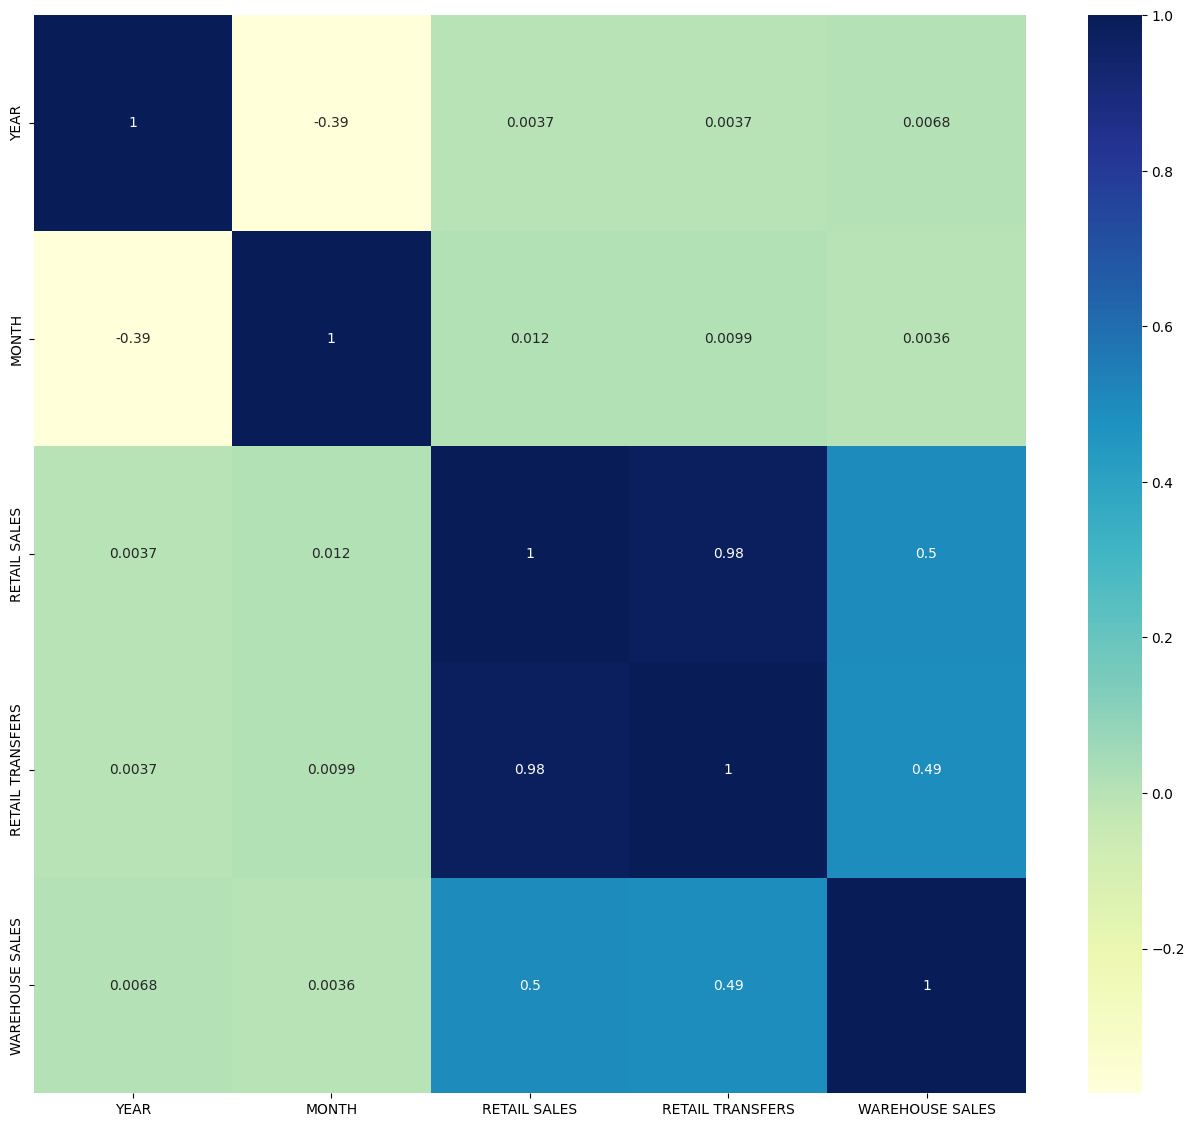

In [7]:
data_clean.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(16, 14))
dataplot = sns.heatmap(data_clean.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

Heat-Mapom promatramo korelaciju numeričkih var. vidimo da retail sales i retail transfer imaju jaku korelaciju.

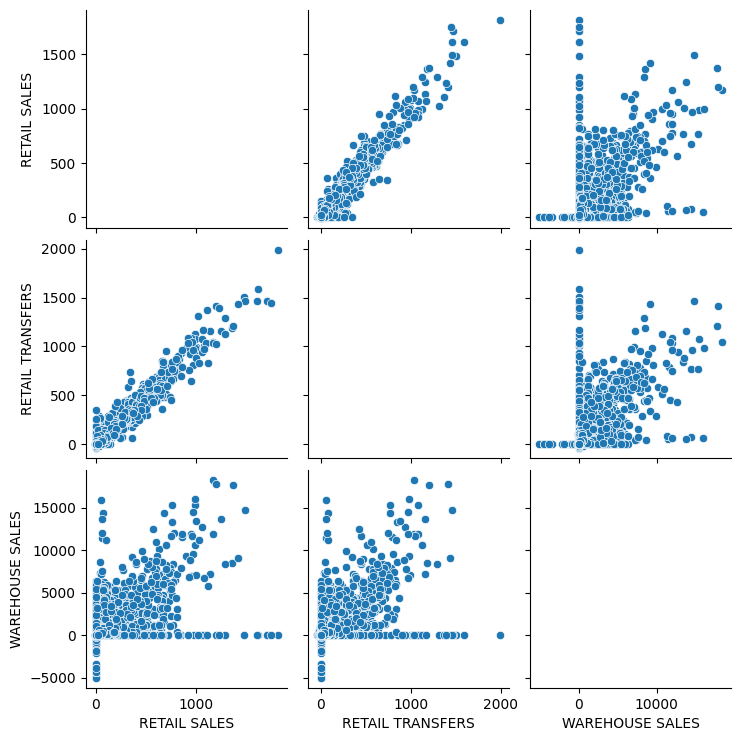

In [8]:
sns.pairplot(data_to_describe)
plt.show()

Pear plot prikazuje scater plot i histograme numeričkih variabli. Na scater plotovima vidimo distribuciju jedne variable ovisno o drugoj.
Histogrami su prazni jer podaci sadrže veliki proj perioda kada nije prodavan alkohol, nisu null verijednosti i stoga su statistički značajni.

In [18]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [19]:
Removed_Outliers=data_clean
remove_outliers_iqr(Removed_Outliers, 'WAREHOUSE SALES')

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
...,...,...,...,...,...,...,...,...,...
307635,2020,9,REPUBLIC NATIONAL DISTRIBUTING CO,99694,PAULANER SALVATORE 4/6NR - 12OZ,BEER,0.25,2.0,5.0
307638,2020,9,LEGENDS LTD,99730,ERDINGER WEISS NR 12/CS - 16.9OZ,BEER,0.00,0.0,4.0
307640,2020,9,LEGENDS LTD,99753,DUTCHESS DE BOURGOGNE NR - 750ML,BEER,0.00,0.0,5.0
307642,2020,9,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,2.25,0.0,0.0


In [20]:
#Testiranje normalnosti podataka
WS = Removed_Outliers['WAREHOUSE SALES']
from scipy.stats import kstest

stat, p_value = kstest(WS, 'norm')
if p_value < 0.05:
  print (p_value)
  print ('Podaci nisu normalno raspoređeni')
else:
  print (p_value)
  print ('Podaci su normalno raspoređeni')

0.0
Podaci nisu normalno raspoređeni


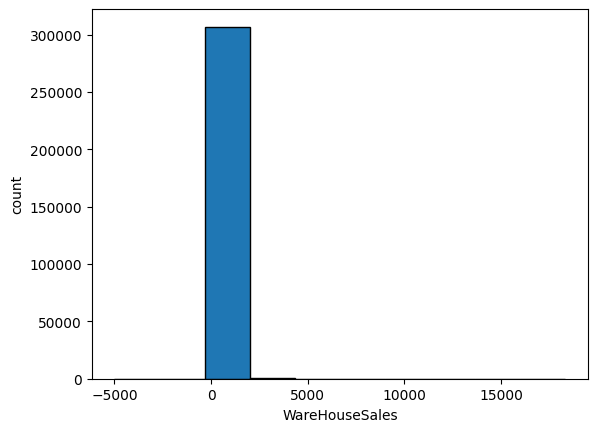

In [22]:

plt.hist(WS, edgecolor='black')
plt.xlabel('WareHouseSales')
plt.ylabel('count')
plt.show()

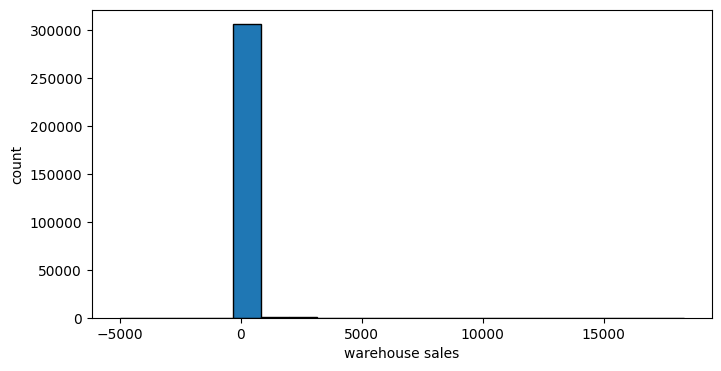

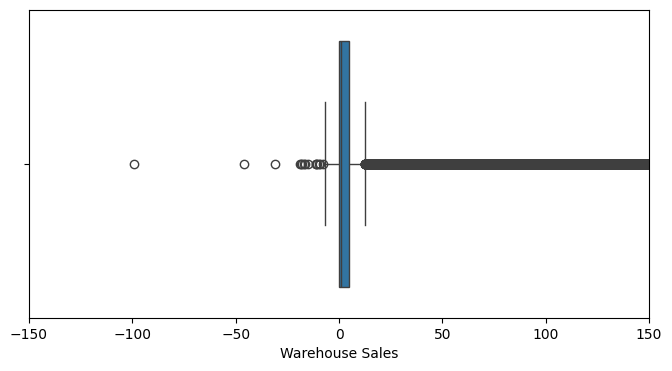

In [30]:
plt.figure(figsize=(8, 4))
WarehouseSales1 = data_clean['WAREHOUSE SALES']
plt.hist(WarehouseSales1, bins=20, edgecolor='black')
plt.xlabel('warehouse sales')
plt.ylabel('count')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=WarehouseSales1)
plt.xlabel('Warehouse Sales')
plt.xlim(-150, 150)
plt.show()

Vidimo kako velika većina vrijednosti je sadržana u outlierima, možemo zaključiti da prodaja alkohola u skladištima je minimalna osim u posebnim slučajevima gdje naglo raste

In [35]:

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

mean, lower, upper = mean_confidence_interval(WarehouseSales1)
print("Mean: ", mean)
print("Upper: ", upper)
print("Lower: ", lower)

Mean:  25.375560708605846
Upper:  26.25745194855304
Lower:  24.493669468658652


Sa sigurnošću od 95% možemo reći da odabrana vrijednost prodaja u skladištu će biti u intervalu od 24.493669468658652 do 26.25745194855304 te da je srednja vrijednost 25.375560708605846

Postoji značajna razlika između skupina (Mann-Whitney).


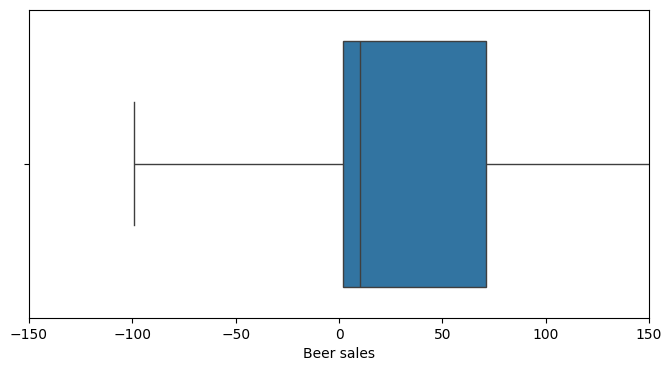

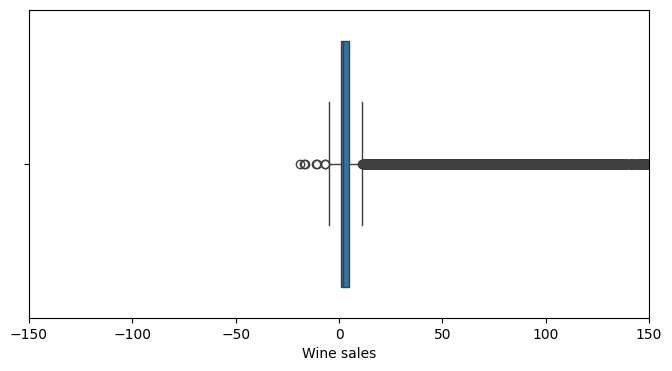

In [37]:
Beer_Sales = data_clean[data_clean['ITEM TYPE'] == 'BEER']['WAREHOUSE SALES']
Wine_Sales = data_clean[data_clean['ITEM TYPE'] == 'WINE']['WAREHOUSE SALES']

stat, p_value = stats.mannwhitneyu(Beer_Sales, Wine_Sales)
if p_value < 0.05:
 print("Postoji značajna razlika između skupina (Mann-Whitney).")
else:
 print("Ne postoji značajna razlika između skupina (Mann-Whitney).")

plt.figure(figsize=(8, 4))
sns.boxplot(x=Beer_Sales)
plt.xlabel('Beer sales')
plt.xlim(-150, 150)
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=Wine_Sales)
plt.xlabel('Wine sales')
plt.xlim(-150, 150)
plt.show()

Zbog ne normalne distribucije koristimo Man Whitney-U test i provjeravamo postoji li značajna razlika između prodaja piva i vina. Vidiom kako postoji značajno veća potražnja za pivom nego vinom

In [50]:
groups = data_clean.groupby('RETAIL SALES')

ELVL1 = groups.get_group(1)['MONTH']
print(ELVL1.describe())

ELVL2 = groups.get_group(3)['MONTH']
print(ELVL2.describe())

ELVL3 = groups.get_group(6)['MONTH']
print(ELVL3.describe())

ELVL4 = groups.get_group(7)['MONTH']
print(ELVL4.describe())

ELVL5 = groups.get_group(9)['MONTH']
print(ELVL4.describe())

count    1437.000000
mean        6.283925
std         3.522724
min         1.000000
25%         3.000000
50%         7.000000
75%         9.000000
max        12.000000
Name: MONTH, dtype: float64
count    439.000000
mean       6.425968
std        3.467838
min        1.000000
25%        3.000000
50%        7.000000
75%        9.000000
max       12.000000
Name: MONTH, dtype: float64
count    240.000000
mean       6.100000
std        3.493928
min        1.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: MONTH, dtype: float64
count    180.000000
mean       6.705556
std        3.656627
min        1.000000
25%        3.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: MONTH, dtype: float64
count    180.000000
mean       6.705556
std        3.656627
min        1.000000
25%        3.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: MONTH, dtype: float64


In [39]:
print(stats.kstest(ELVL1, 'norm'))
print(stats.kstest(ELVL2, 'norm'))
print(stats.kstest(ELVL3, 'norm'))
print(stats.kstest(ELVL4, 'norm'))

KstestResult(statistic=np.float64(0.8443340712529342), pvalue=np.float64(0.0), statistic_location=np.int64(2), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(0.8451314170267639), pvalue=np.float64(0.0), statistic_location=np.int64(2), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(0.8413447460685429), pvalue=np.float64(1.8607874290209362e-191), statistic_location=np.int64(1), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(0.8413447460685429), pvalue=np.float64(1.037614558433356e-143), statistic_location=np.int64(1), statistic_sign=np.int8(-1))


In [40]:
from scipy.stats import levene

levene(ELVL1, ELVL2, ELVL3, ELVL4, center='mean')

LeveneResult(statistic=np.float64(0.6966256928965995), pvalue=np.float64(0.5540641565418132))

Po KS testu vidimo da variable nisu normalno raspoređene, a po leven testu vidimo da variance nisu značajno različite.

In [41]:
from scipy.stats import f_oneway

f_oneway(ELVL1, ELVL2, ELVL3, ELVL4)

F_onewayResult(statistic=np.float64(1.2137995783901048), pvalue=np.float64(0.3031393515436306))

one way Anova nije pogodna jer podaci nisu normalno distribuirani te će se koristit kruskal-walis

In [42]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.7 MB/s eta 0:00:00


In [51]:
from pingouin import kruskal, read_dataset
grupe=[ELVL1, ELVL2, ELVL3, ELVL4, ELVL5]
kruskal(data=data_clean, dv='RETAIL SALES', between='MONTH')

,Source,ddof1,H,p-unc
Kruskal,MONTH,11,645.730265,2.287017e-131


Kruskal walis nam govori da ne postoji značajna razlika u varianci između najmanje 2 od zadanih grupa

In [48]:
!pip install scikit-posthocs
import scikit_posthocs as sp

In [52]:
posthoc = sp.posthoc_dunn(grupe, p_adjust = 'bonferroni')
print(posthoc)

     1    2        3        4    5
1  1.0  1.0  1.00000  1.00000  1.0
2  1.0  1.0  1.00000  1.00000  1.0
3  1.0  1.0  1.00000  0.63399  1.0
4  1.0  1.0  0.63399  1.00000  1.0
5  1.0  1.0  1.00000  1.00000  1.0


kako niti jedna vrijednost nije manja od 0.05 vidimo da kao što je kruuskal walis pokazao nema značajne razlike između varianca zadanih grupa

In [ ]:
model = ols('height ~ C(Fertilizer) + C(Watering) + C(Fertilizer):C(Watering)', data=dataframe).fit()
anova_result = sm.stats.anova_lm(model, type=2)

In [54]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('RETAIL SALES ~ C(MONTH) + C(ITEM TYPE)', data = data_clean).fit()
result = sm.stats.anova_lm(model, typ=2)
print(result)

SyntaxError: invalid syntax (<unknown>, line 1)

Slope: 0.0013158268299616734
Intercept: 6.414848656508958
R-value: 0.011549895752919506
P-value: 1.506899627933047e-10
Standard error: 0.00020544084780659743


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


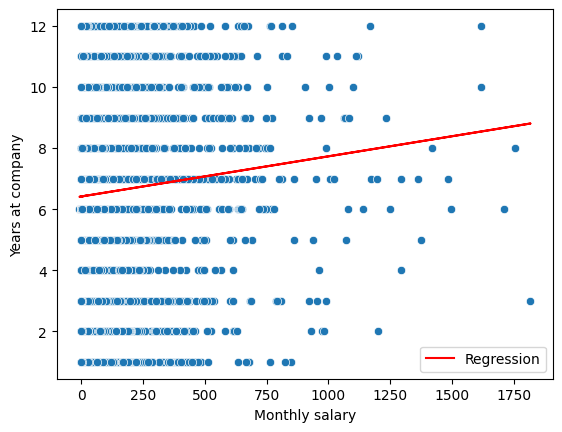

In [56]:
ZAVISNA = data_clean['RETAIL SALES']
NEZAVISNA = data_clean['MONTH']

slope, intercept, r_value, p_value, std_err = stats.linregress(ZAVISNA, NEZAVISNA)
print("Slope:", slope)
print("Intercept:", intercept)
print("R-value:", r_value)
print("P-value:", p_value)
print("Standard error:", std_err)

sns.scatterplot(x=ZAVISNA, y=NEZAVISNA)
plt.plot(ZAVISNA, intercept + slope * ZAVISNA, color='red', label='Regression')
plt.xlabel('Monthly salary')
plt.ylabel('Years at company')
plt.legend()
plt.show()

nije moguće predvidjeti vrijednost jer dvije variable nisu linearno povezane